In [1]:
# numpy version as a comparison
import numpy as np

a = np.random.rand(10000)
print(a.shape, a.dtype)

(10000,) float64


In [5]:
print(a.sum())
print(a.mean())

4980.465936169939
0.4980465936169939


In [6]:
# dask version, chunking handled automatically
import dask.array as da
a_dask = da.from_array(a, chunks=len(a) // 4)
a_dask.chunks

((2500, 2500, 2500, 2500),)

In [8]:
# Sum with a numpy array
n_chunks = 4
chunk_size = len(a) // n_chunks
result = 0

for k in range(n_chunks):
    offset = k * chunk_size
    a_chunk = a[offset:offset + chunk_size]
    result += a_chunk.sum()
print(result)

4980.465936169938


4980.465936169938


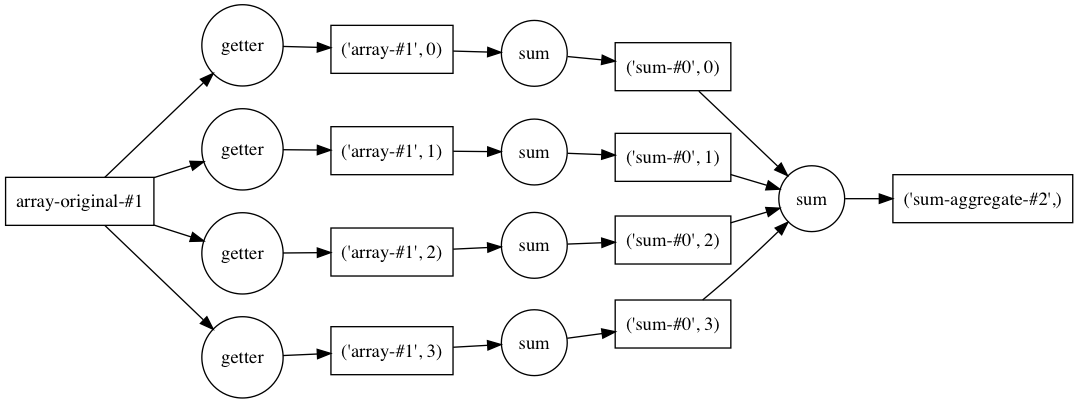

In [9]:
# Sum with a dask array
a_dask = da.from_array(a, chunks=len(a)//n_chunks)
result = a_dask.sum()
result
print(result.compute())
result.visualize(rankdir='LR')